# EEG feature plotting for different brain areas over time (across subjects)

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
import seaborn as sns
import matplotlib

import os
import random
import scipy

from bootstrap_code.bootstrap_routines import *
from utils import *
from eeg_feature_extraction.eeg_utils import *

random.seed(42)
sns.set_style("white")

In [2]:
duplicate_sents_data = pd.read_csv('./task_materials/duplicate_sentences.csv')
duplicate_sents = list(duplicate_sents_data.sentence.values)

In [3]:
files_task2 = get_matfiles('task2')
files_task3 = get_matfiles('task3')

data_task2_sbj1 = io.loadmat(files_task2[0], squeeze_me=True, struct_as_record=False)['sentenceData']
data_task3_sbj1 = io.loadmat(files_task3[0], squeeze_me=True, struct_as_record=False)['sentenceData']

sent_lens_task2_sbj1 = [len(sent.word) for sent in data_task2_sbj1]
sent_lens_task3_sbj1 = [len(sent.word) for sent in data_task3_sbj1]

In [4]:
relation_labels_task2 = pd.read_csv('./task_materials/relations_labels_task2.csv', sep = ',')
relation_labels_task3 = pd.read_csv('./task_materials/relations_labels_task3.csv', sep = ';')

In [5]:
# get indices of sentences with relation labels
indices_relations_task2 = [idx for idx, relation in enumerate(relation_labels_task2.relation_types.values) if relation != 'NO-RELATION'] 
indices_no_relations_task2 = [idx for idx, relation in enumerate(relation_labels_task2.relation_types.values) if relation == 'NO-RELATION'] 
assert len(indices_relations_task2) + len(indices_no_relations_task2) == len(data_task2_sbj1)

indices_relations_task3 = [idx for idx, relation in enumerate(relation_labels_task3['relation-type'].values) if relation != 'CONTROL'] 
indices_no_relations_task3 = [idx for idx, relation in enumerate(relation_labels_task3['relation-type'].values) if relation == 'CONTROL'] 
assert len(indices_relations_task3) + len(indices_no_relations_task3) == len(data_task3_sbj1)

In [9]:
# Extract EEG features for all sentences for all tasks and subjects
eeg_feats_all_sbjs_task2 = np.vstack([get_eeg_features('task2', i, 'most_important', 'avg') for i in range(12)])
eeg_feats_all_sbjs_task3 = np.vstack([get_eeg_features('task3', i, 'most_important', 'avg') for i in range(12)])

No data to analyse for sentence 0
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 1
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 2
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 3
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 4
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 5
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 6
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 7
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 8
Inspect whether you are using all subjects for current data transformation!
No data to

No data to analyse for sentence 178
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 179
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 180
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 181
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 182
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 183
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 184
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 185
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 186
Inspect whether you are using all subjects for current data transfor

No data to analyse for sentence 270
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 271
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 272
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 273
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 274
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 275
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 276
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 277
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 278
Inspect whether you are using all subjects for current data transfor

In [6]:
# Extract EEG features for duplicate sentences only
eeg_feats_all_sbjs_task2_dup = np.vstack([get_eeg_features('task2', i, 'most_important', 'avg', duplicate_sents=duplicate_sents) 
                                          for i in range(12)])
eeg_feats_all_sbjs_task3_dup = np.vstack([get_eeg_features('task3', i, 'most_important', 'avg', duplicate_sents=duplicate_sents) 
                                          for i in range(12)])

No data to analyse for sentence 0
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 12
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 18
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 47
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 48
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 58
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 61
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 62
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 63
Inspect whether you are using all subjects for current data transformation!
No

In [7]:
# Extract EEG features for sentences with or without relations respectively

eeg_feats_all_sbjs_task2_relations = np.vstack([get_eeg_features('task2', i, 'most_important', 'avg', 
                                                split_sents=True, relation_indices=indices_relations_task2) 
                                                for i in range(12)])

eeg_feats_all_sbjs_task2_no_relations = np.vstack([get_eeg_features('task2', i, 'most_important', 'avg',
                                                split_sents=True, relation_indices=indices_no_relations_task2) 
                                                for i in range(12)])

eeg_feats_all_sbjs_task3_relations = np.vstack([get_eeg_features('task3', i, 'most_important', 'avg', 
                                                split_sents=True, relation_indices=indices_relations_task3) 
                                                for i in range(12)])

eeg_feats_all_sbjs_task3_no_relations = np.vstack([get_eeg_features('task3', i, 'most_important', 'avg',
                                                split_sents=True, relation_indices=indices_no_relations_task3) 
                                                for i in range(12)])

No data to analyse for sentence 0
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 1
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 2
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 3
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 4
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 5
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 6
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 7
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 8
Inspect whether you are using all subjects for current data transformation!
No data to

No data to analyse for sentence 0
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 1
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 2
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 3
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 4
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 5
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 6
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 7
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 8
Inspect whether you are using all subjects for current data transformation!
No data to

No data to analyse for sentence 178
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 179
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 180
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 181
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 182
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 183
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 184
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 185
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 186
Inspect whether you are using all subjects for current data transfor

No data to analyse for sentence 270
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 271
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 272
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 273
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 274
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 275
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 276
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 277
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 278
Inspect whether you are using all subjects for current data transfor

No data to analyse for sentence 178
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 179
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 180
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 181
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 182
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 183
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 184
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 185
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 186
Inspect whether you are using all subjects for current data transfor

No data to analyse for sentence 270
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 271
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 272
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 273
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 274
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 275
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 276
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 277
Inspect whether you are using all subjects for current data transformation!
No data to analyse for sentence 278
Inspect whether you are using all subjects for current data transfor

In [12]:
eeg_data_per_sent_task2_sbj1 = reshape_into_tensor_vis(eeg_feats_all_sbjs_task2, sent_lens_task2_sbj1)
eeg_data_per_sent_task3_sbj1 = reshape_into_tensor_vis(eeg_feats_all_sbjs_task3, sent_lens_task3_sbj1)

In [13]:
eeg_data_per_sent_task2_sbj1_rel = reshape_into_tensor_vis(eeg_feats_all_sbjs_task2_relations, sent_lens_task2_sbj1)
eeg_data_per_sent_task2_sbj1_no_rel = reshape_into_tensor_vis(eeg_feats_all_sbjs_task2_no_relations, sent_lens_task2_sbj1)

eeg_data_per_sent_task3_sbj1_rel = reshape_into_tensor_vis(eeg_feats_all_sbjs_task3_relations, sent_lens_task3_sbj1)
eeg_data_per_sent_task3_sbj1_no_rel = reshape_into_tensor_vis(eeg_feats_all_sbjs_task3_no_relations, sent_lens_task3_sbj1)

In [14]:
eeg_locs_all_freqs = get_eeg_locs('\\important_eeg_features\\')
eeg_locs_alpha_freqs = eeg_locs_all_freqs[0]
eeg_locs_beta_freqs = eeg_locs_all_freqs[1]
eeg_locs_gamma_freqs = eeg_locs_all_freqs[2]
eeg_locs_theta_freqs = eeg_locs_all_freqs[3]

In [17]:
# important variables for plotting and statistical analyses
eeg_electrodes_all = np.array(['E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E9', 'E10', 'E11', 'E12', 'E13', 'E15', 'E16', 'E18', 'E19', 'E20', 'E22', 'E23', 'E24', 'E26', 'E27', 'E28', 'E29', 'E30', 'E31', 'E33', 'E34', 'E35', 'E36', 'E37', 'E38', 'E39', 'E40', 'E41', 'E42', 'E43', 'E44', 'E45', 'E46', 'E47', 'E50', 'E51', 'E52', 'E53', 'E54', 'E55', 'E57', 'E58', 'E59', 'E60', 'E61', 'E62', 'E64', 'E65', 'E66', 'E67', 'E69', 'E70', 'E71', 'E72', 'E74', 'E75', 'E76', 'E77', 'E78', 'E79', 'E80', 'E82', 'E83', 'E84', 'E85', 'E86', 'E87', 'E89', 'E90', 'E91', 'E92', 'E93', 'E95', 'E96', 'E97', 'E98', 'E100', 'E101', 'E102', 'E103', 'E104', 'E105', 'E106', 'E108', 'E109', 'E110', 'E111', 'E112', 'E114', 'E115', 'E116', 'E117', 'E118', 'E120', 'E121', 'E122', 'E123', 'E124', 'Cz'])

temporal_electrodes_alpha = ['E38', 'E43', 'E120', 'E121']
temporal_electrodes_beta = ['E38', 'E43', 'E57', 'E121']
temporal_electrodes_gamma = ['E38', 'E43', 'E44', 'E121']
temporal_electrodes_theta = ['E38', 'E43', 'E114', 'E120', 'E121']

frontoparietal_electrodes_alpha = ['E26', 'E30', 'E54']
frontoparietal_electrodes_beta = ['E2', 'E12', 'E26', 'E30' ]
frontoparietal_electrodes_gamma = ['E2', 'E26', 'E31']
frontoparietal_electrodes_theta = ['E4', 'E5', 'E118']

et_feature = 'TRT'

## $\alpha$-frequency domain

In [64]:
## Temporal Cortex ##
temporal_electrodes_alpha_all, temporal_indices_alpha_all = extract_electrodes_and_indices(eeg_electrodes_all,
                                                                                           eeg_locs_alpha_freqs, 
                                                                                           temporal_electrodes_alpha)
## Frontal & Parietal Cortex ##
frontoparietal_electrodes_alpha_all, frontoparietal_indices_alpha_all = extract_electrodes_and_indices(eeg_electrodes_all,
                                                                                                       eeg_locs_alpha_freqs, 
                                                                                                       frontoparietal_electrodes_alpha)

In [ ]:
#kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':2})

#feat = 0
#fig, axes = plt.subplots(4, 4, figsize=(16, 14), dpi=100)
#for i, row in enumerate(axes):
#    for j, col in enumerate(row):
#        sns.distplot(eeg_feats_all_sbjs_task2[:, temporal_indices_alpha_all[feat]], color="dodgerblue", label="Normal Reading (NR)", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
#        sns.distplot(eeg_feats_all_sbjs_task3[:, temporal_indices_alpha_all[feat]], color="orange", label="Task Specific Reading (TSR)", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
#        axes[i][j].annotate(r'$\bar x_N$ = {:.3g}'.format(eeg_feats_all_sbjs_task2[:, temporal_indices_alpha_all[feat]].mean()), (1.8, 0.6))
#        axes[i][j].annotate(r'$\bar x_T$ = {:.3g}'.format(eeg_feats_all_sbjs_task3[:, temporal_indices_alpha_all[feat]].mean()), (1.8, 0.5))
#        axes[i][j].set_title(r'EEG activity Temporal-{} for {} ($\alpha$-freq)'.format(temporal_electrodes_alpha_all[feat], et_features[i]), fontsize = 10)
#        axes[i][j].set_ylabel(r'Density')
#        axes[i][j].legend(fancybox=True, framealpha=1, loc='upper right', prop={'size':7})
#        axes[i][j].set_xlim(0, 2.5)
#        feat += 1
#plt.savefig('plots/alpha_activity_temporal')
#plt.show()

### Density plots for activity in temporal cortex for duplicate sentences across all tasks and subjects

Observed difference of two means: -0.12
0 out of 10000 experiments had a difference of two means less than or equal to -0.12
The chance of getting a difference of two means less than or equal to -0.12 is 0.0000
Observed difference of two means: -0.08
0 out of 10000 experiments had a difference of two means less than or equal to -0.08
The chance of getting a difference of two means less than or equal to -0.08 is 0.0000
Observed difference of two means: -0.01
2798 out of 10000 experiments had a difference of two means less than or equal to -0.01
The chance of getting a difference of two means less than or equal to -0.01 is 0.2798
Observed difference of two means: 0.02
263 out of 10000 experiments had a difference of two means greater than or equal to 0.02
The chance of getting a difference of two means greater than or equal to 0.02 is 0.0263


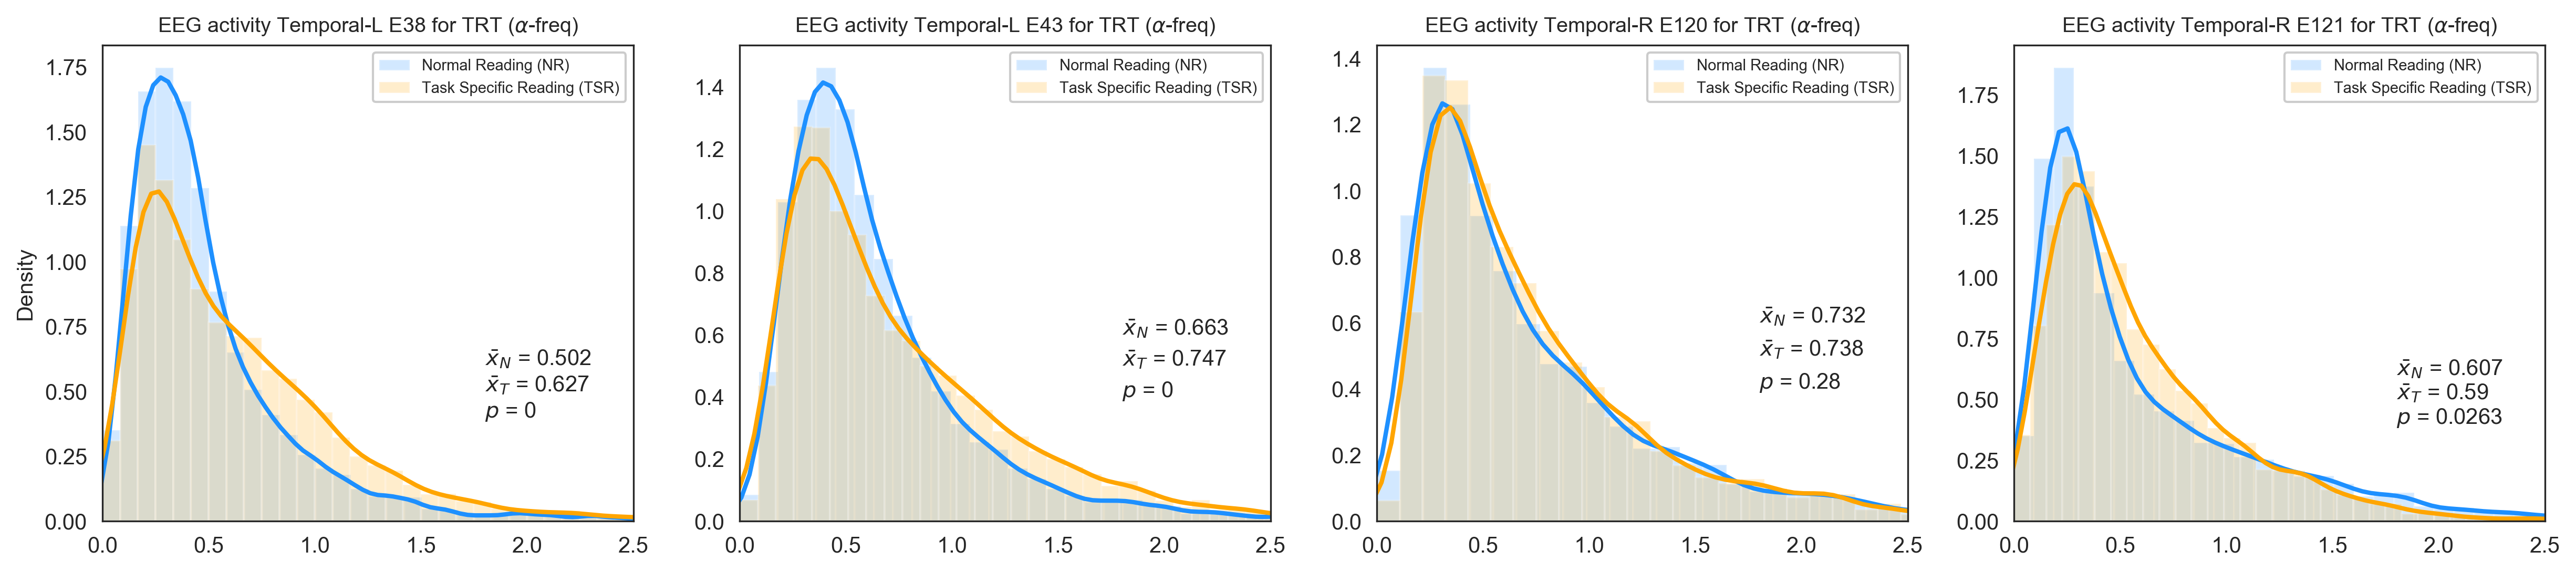

<Figure size 432x288 with 0 Axes>

In [78]:
kwargs = dict(hist_kws={'alpha':.2}, kde_kws={'linewidth':2})

feat = 0
fig, axes = plt.subplots(1, 4, figsize=(20, 4), dpi=300)
for i, _ in enumerate(axes):
    sns.distplot(eeg_feats_all_sbjs_task2_dup[:, temporal_indices_alpha_all[feat]], color="dodgerblue", label="Normal Reading (NR)", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task3_dup[:, temporal_indices_alpha_all[feat]], color="orange", label="Task Specific Reading (TSR)", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    axes[i].annotate(r'$\bar x_N$ = {:.3g}'.format(eeg_feats_all_sbjs_task2_dup[:, temporal_indices_alpha_all[feat]].mean()), (1.8, 0.6))
    axes[i].annotate(r'$\bar x_T$ = {:.3g}'.format(eeg_feats_all_sbjs_task3_dup[:, temporal_indices_alpha_all[feat]].mean()), (1.8, 0.5))
    axes[i].annotate(r'$p$ = {:.3g}'.format(bootpv(eeg_feats_all_sbjs_task2_dup[:, temporal_indices_alpha_all[feat]], eeg_feats_all_sbjs_task3_dup[:, temporal_indices_alpha_all[feat]])), (1.8, 0.4))
    if i < 2:
        axes[i].set_title(r'EEG activity Temporal-L {} for {} ($\alpha$-freq)'.format(temporal_electrodes_alpha_all[feat], et_feature), fontsize=9.5)
    else:
        axes[i].set_title(r'EEG activity Temporal-R {} for {} ($\alpha$-freq)'.format(temporal_electrodes_alpha_all[feat], et_feature), fontsize=9.5)
    if i == 0: axes[i].set_ylabel(r'Density')
    axes[i].legend(fancybox=True, framealpha=1, loc='upper right', prop={'size':7})
    axes[i].set_xlim(0, 2.5)
    feat += 1
#plt.savefig('plots/alpha_activity_temporal')
plt.show()
plt.clf()

### Density plots for activity in temporal cortex for all sentences across all tasks and subjects

In [ ]:
kwargs = dict(hist_kws={'alpha':.2}, kde_kws={'linewidth':2})

feat = 0
fig, axes = plt.subplots(1, 4, figsize=(20, 4), dpi=300)
for i, _ in enumerate(axes):
    sns.distplot(eeg_feats_all_sbjs_task2_relations[:, temporal_indices_alpha_all[feat]], color="dodgerblue", label="NR - Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task2_no_relations[:, temporal_indices_alpha_all[feat]], color="turquoise", label="NR - No Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task3_relations[:, temporal_indices_alpha_all[feat]], color="darkorange", label="TSR - Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task3_no_relations[:, temporal_indices_alpha_all[feat]], color="firebrick", label="TSR - No Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    axes[i].annotate(r'$\bar x_N$ = {:.3g} (Rel) '.format(eeg_feats_all_sbjs_task2_relations[:, temporal_indices_alpha_all[feat]].mean()), (1.5, 0.7), fontsize=8)
    axes[i].annotate(r'$\bar x_N$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task2_no_relations[:, temporal_indices_alpha_all[feat]].mean()), (1.5, 0.6), fontsize=8)
    axes[i].annotate(r'$\bar x_T$ = {:.3g} (Rel)'.format(eeg_feats_all_sbjs_task3_relations[:, temporal_indices_alpha_all[feat]].mean()), (1.5, 0.5), fontsize=8)
    axes[i].annotate(r'$\bar x_T$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task3_no_relations[:, temporal_indices_alpha_all[feat]].mean()), (1.5, 0.4), fontsize=8)
    axes[i].annotate(r'$p$ = {:.3g}'.format(bootpv(eeg_feats_all_sbjs_task2[:, temporal_indices_alpha_all[feat]], eeg_feats_all_sbjs_task3[:, temporal_indices_alpha_all[feat]])), (1.5, 0.3))
    if i < 2:
        axes[i].set_title(r'EEG activity Temporal-L {} for {} ($\alpha$-freq)'.format(temporal_electrodes_alpha_all[feat], et_feature), fontsize=9.5)
    else:
        axes[i].set_title(r'EEG activity Temporal-R {} for {} ($\alpha$-freq)'.format(temporal_electrodes_alpha_all[feat], et_feature), fontsize=9.5)
    if i == 0: axes[i].set_ylabel(r'Density')
    axes[i].legend(fancybox=True, framealpha=1, loc='upper right', prop={'size':7})
    axes[i].set_xlim(0, 2.5)
    feat += 1
#plt.savefig('plots/alpha_activity_temporal')
plt.show()
plt.clf()

Observed difference of two means: -0.11
0 out of 10000 experiments had a difference of two means less than or equal to -0.11
The chance of getting a difference of two means less than or equal to -0.11 is 0.0000


### Density plots for activity in frontoparietal cortex for duplicate sentences across all tasks and subjects

In [ ]:
kwargs = dict(hist_kws={'alpha':.2}, kde_kws={'linewidth':2})

feat = 0
fig, axes = plt.subplots(1, 3, figsize=(20, 4), dpi=300)
for i, _ in enumerate(axes):
    sns.distplot(eeg_feats_all_sbjs_task2_dup[:, frontoparietal_indices_alpha_all[feat]], color="dodgerblue", label="Normal Reading (NR)", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task3_dup[:, frontoparietal_indices_alpha_all[feat]], color="orange", label="Task Specific Reading (TSR)", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    axes[i].annotate(r'$\bar x_N$ = {:.3g}'.format(eeg_feats_all_sbjs_task2_dup[:, frontoparietal_indices_alpha_all[feat]].mean()), (1.8, 0.6))
    axes[i].annotate(r'$\bar x_T$ = {:.3g}'.format(eeg_feats_all_sbjs_task3_dup[:, frontoparietal_indices_alpha_all[feat]].mean()), (1.8, 0.5))
    if i == 0:
        axes[i].set_title(r'EEG activity Frontal {} for {} ($\alpha$-freq)'.format(frontoparietal_electrodes_alpha_all[feat], et_feature), fontsize=9.5)
    else:
        axes[i].set_title(r'EEG activity Parietal {} for {} ($\alpha$-freq)'.format(frontoparietal_electrodes_alpha_all[feat], et_feature), fontsize=9.5)
    if i == 0: axes[i].set_ylabel(r'Density')
    axes[i].legend(fancybox=True, framealpha=1, loc='upper right', prop={'size':7})
    axes[i].set_xlim(0, 2.5)
    feat += 1
#plt.savefig('plots/alpha_activity_temporal')
plt.show()
plt.clf()

### Density plots for activity in frontoparietal cortex for all sentences across all tasks and subjects

In [ ]:
kwargs = dict(hist_kws={'alpha':.2}, kde_kws={'linewidth':2})

feat = 0
fig, axes = plt.subplots(1, 3, figsize=(20, 4), dpi=300)
for i, _ in enumerate(axes):
    sns.distplot(eeg_feats_all_sbjs_task2_relations[:, frontoparietal_indices_alpha_all[feat]], color="dodgerblue", label="NR - Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task2_no_relations[:, frontoparietal_indices_alpha_all[feat]], color="turquoise", label="NR - No Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task3_relations[:, frontoparietal_indices_alpha_all[feat]], color="darkorange", label="TSR - Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task3_no_relations[:, frontoparietal_indices_alpha_all[feat]], color="firebrick", label="TSR - No Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    pos = [(1.7, 0.6), (1.7, 0.55), (1.7, 0.5), (1.7, 0.45)] if i == 2 else [(1.5, 0.7), (1.5, 0.6), (1.5, 0.5), (1.5, 0.4)]
    axes[i].annotate(r'$\bar x_N$ = {:.3g} (Rel) '.format(eeg_feats_all_sbjs_task2_relations[:, frontoparietal_indices_alpha_all[feat]].mean()), pos[0], fontsize=8)
    axes[i].annotate(r'$\bar x_N$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task2_no_relations[:, frontoparietal_indices_alpha_all[feat]].mean()), pos[1], fontsize=8)
    axes[i].annotate(r'$\bar x_T$ = {:.3g} (Rel)'.format(eeg_feats_all_sbjs_task3_relations[:, frontoparietal_indices_alpha_all[feat]].mean()), pos[2], fontsize=8)
    axes[i].annotate(r'$\bar x_T$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task3_no_relations[:, frontoparietal_indices_alpha_all[feat]].mean()), pos[3], fontsize=8)
    if i == 0:
        axes[i].set_title(r'EEG activity Frontal {} for {} ($\alpha$-freq)'.format(frontoparietal_electrodes_alpha_all[feat], et_feature), fontsize = 10)
    else:
        axes[i].set_title(r'EEG activity Parietal {} for {} ($\alpha$-freq)'.format(frontoparietal_electrodes_alpha_all[feat], et_feature), fontsize = 10)
    if i == 0: axes[i].set_ylabel(r'Density')
    axes[i].legend(fancybox=True, framealpha=1, loc='upper right', prop={'size':7})
    axes[i].set_xlim(0, 2.5)
    feat += 1
#plt.savefig('plots/alpha_activity_temporal')
plt.show()
plt.clf()

### Brain activity in the temporal cortex over time for single test subject(s) (Normal Reading)

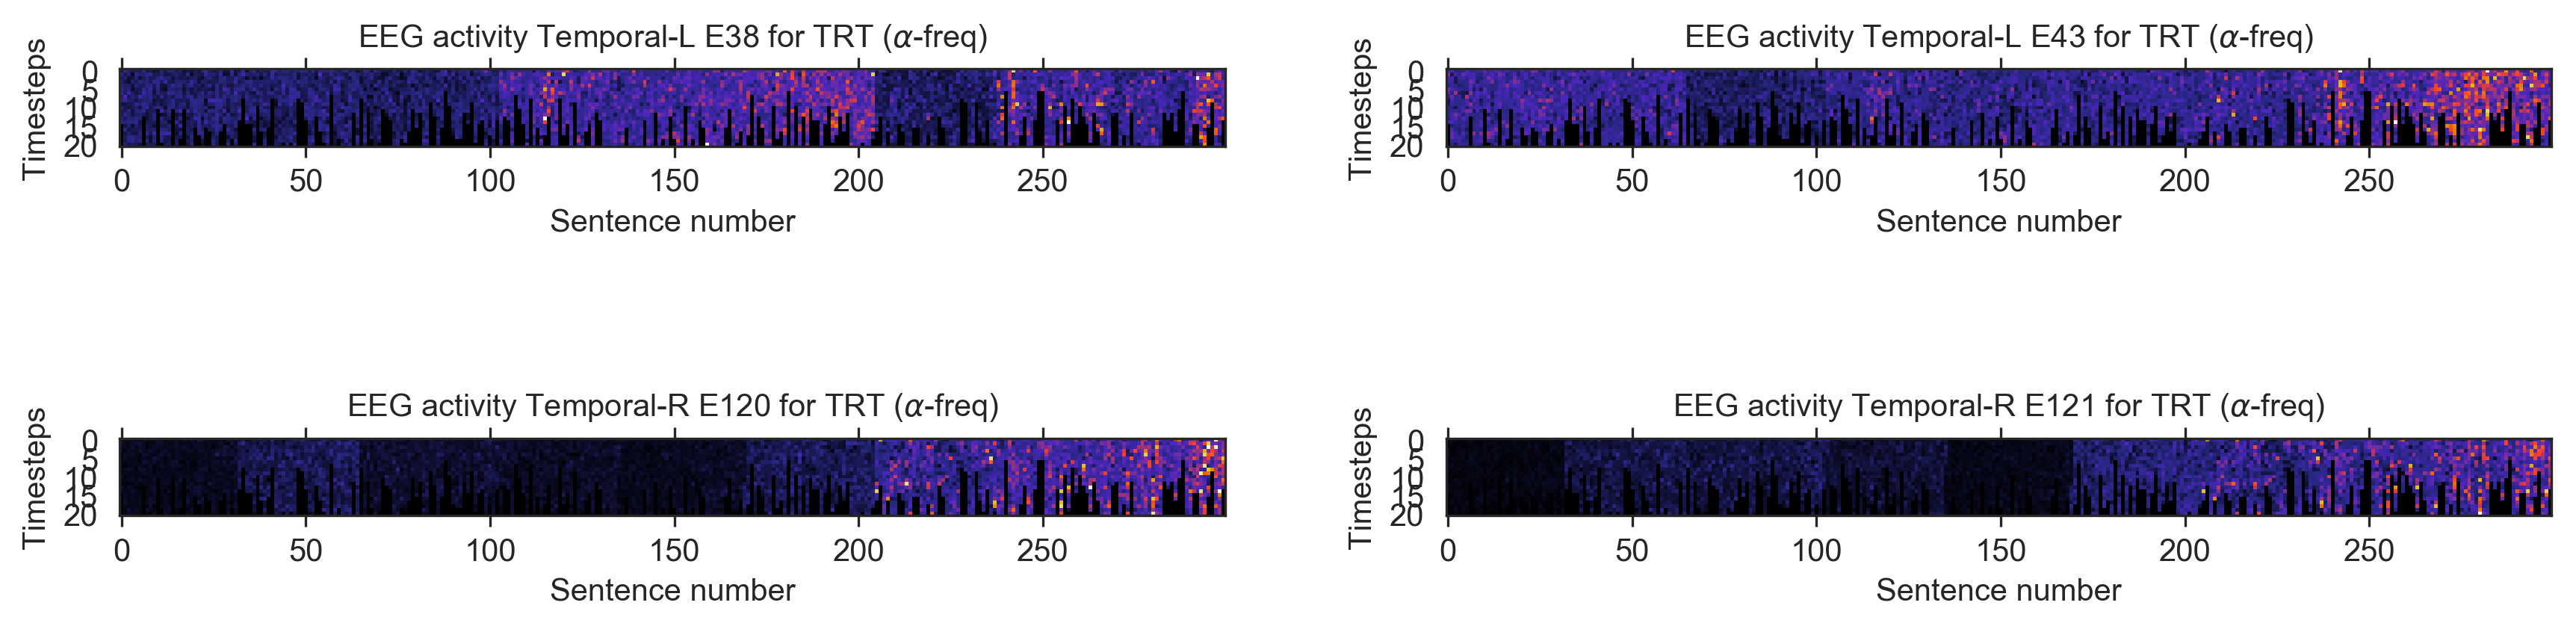

In [69]:
et_feat_idx = 0
feat = 0
fig, axes = plt.subplots(2, 2, figsize=(14, 4), dpi=300)
for i, row in enumerate(axes):
    if (i % 2 == 0) and (i > 0): et_feat_idx += 1
    for j, col in enumerate(row):
        axes[i][j].matshow(truncating(map_electrode_onto_tensor(eeg_data_per_sent_task2_sbj1, temporal_indices_alpha_all[feat])).T, cmap='CMRmap')
        if (i % 2 == 0):
            axes[i][j].set_title(r'EEG activity Temporal-L {} for {} ($\alpha$-freq)'.format(temporal_electrodes_alpha_all[feat], et_feature), fontsize = 10)
        else:
            axes[i][j].set_title(r'EEG activity Temporal-R {} for {} ($\alpha$-freq)'.format(temporal_electrodes_alpha_all[feat], et_feature), fontsize = 10)
        axes[i][j].set_xlabel('Sentence number')
        axes[i][j].set_ylabel('Timesteps')
        axes[i][j].xaxis.set_tick_params(labeltop=False)
        axes[i][j].xaxis.set_tick_params(labelbottom=True)
        feat += 1
plt.savefig('plots/alpha_activity_temporal_heatmap_sbj1_task2')
plt.show()

### Brain activity in the temporal cortex over time for single test subject(s) (Task Specific Reading)

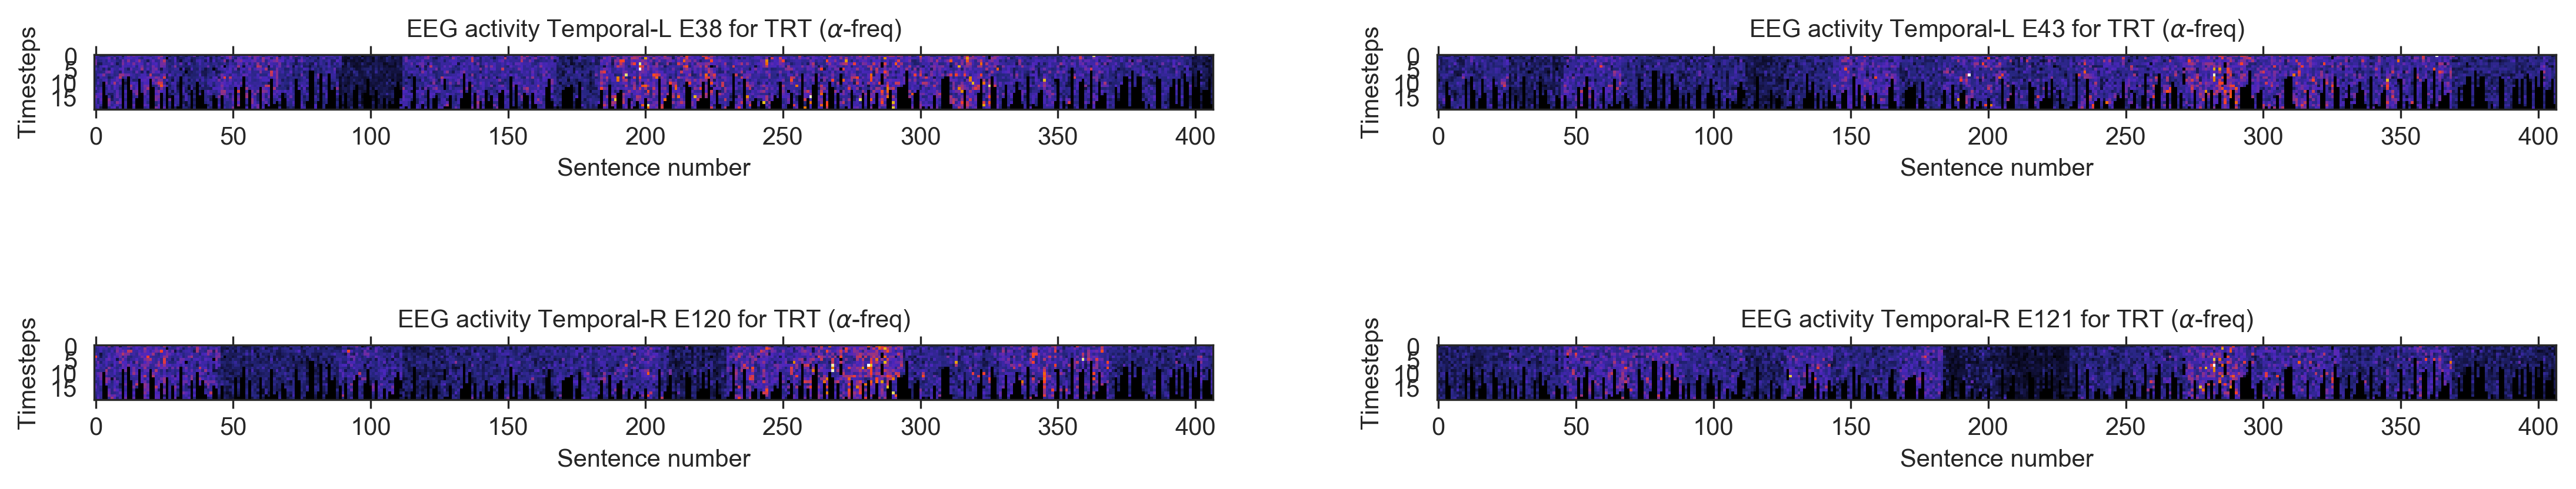

<Figure size 432x288 with 0 Axes>

In [73]:
et_feat_idx = 0
feat = 0
fig, axes = plt.subplots(2, 2, figsize=(18, 4), dpi=300)
for i, row in enumerate(axes):
    if (i % 2 == 0) and (i > 0): et_feat_idx += 1
    for j, col in enumerate(row):
        axes[i][j].matshow(truncating(map_electrode_onto_tensor(eeg_data_per_sent_task3_sbj1, temporal_indices_alpha_all[feat])).T, cmap='CMRmap')
        if (i % 2 == 0):
            axes[i][j].set_title(r'EEG activity Temporal-L {} for {} ($\alpha$-freq)'.format(temporal_electrodes_alpha_all[feat], et_feature), fontsize = 10)
        else:
            axes[i][j].set_title(r'EEG activity Temporal-R {} for {} ($\alpha$-freq)'.format(temporal_electrodes_alpha_all[feat], et_feature), fontsize = 10)
        axes[i][j].set_xlabel('Sentence number')
        axes[i][j].set_ylabel('Timesteps')
        axes[i][j].xaxis.set_tick_params(labeltop=False)
        axes[i][j].xaxis.set_tick_params(labelbottom=True)
        feat += 1
plt.savefig('plots/alpha_activity_temporal_heatmap_sbj1_task3')
plt.show()
plt.clf()

## $\beta$-frequency domain

In [63]:
## Temporal Cortex ##
temporal_electrodes_beta_all, temporal_indices_beta_all = extract_electrodes_and_indices(eeg_electrodes_all,
                                                                                         eeg_locs_beta_freqs, 
                                                                                         temporal_electrodes_beta, 
                                                                                         k=10)
## Frontal & Parietal Cortex ##
frontoparietal_electrodes_beta_all, frontoparietal_indices_beta_all = extract_electrodes_and_indices(eeg_electrodes_all,
                                                                                                     eeg_locs_beta_freqs, 
                                                                                                     frontoparietal_electrodes_beta, 
                                                                                                     k=10)

In [ ]:
#kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':2})

#feat = 0
#fig, axes = plt.subplots(4, 4, figsize=(16, 14), dpi=100)
#for i, row in enumerate(axes):
#    for j, col in enumerate(row):
#        sns.distplot(eeg_feats_all_sbjs_task2[:, temporal_indices_beta_all[feat]], color="dodgerblue", label="Normal Reading (NR)", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
#        sns.distplot(eeg_feats_all_sbjs_task3[:, temporal_indices_beta_all[feat]], color="orange", label="Task Specific Reading (TSR)", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
#        axes[i][j].annotate(r'$\bar x_N$ = {:.3g}'.format(eeg_feats_all_sbjs_task2[:, temporal_indices_beta_all[feat]].mean()), (1.8, 0.6))
#        axes[i][j].annotate(r'$\bar x_T$ = {:.3g}'.format(eeg_feats_all_sbjs_task3[:, temporal_indices_beta_all[feat]].mean()), (1.8, 0.45))
#        axes[i][j].set_title(r'EEG activity Temporal-{} for {} ($\beta$-freq)'.format(temporal_electrodes_beta_all[feat], et_features[i]), fontsize = 10)
#        axes[i][j].set_ylabel(r'Density')
#        axes[i][j].legend(fancybox=True, framealpha=1, loc='upper right', prop={'size':7})
#        axes[i][j].set_xlim(0, 2.5)
#        feat += 1
#plt.savefig('plots/beta_activity_temporal')
#plt.show()

### Density plots for activity in temporal cortex across all tasks and subjects

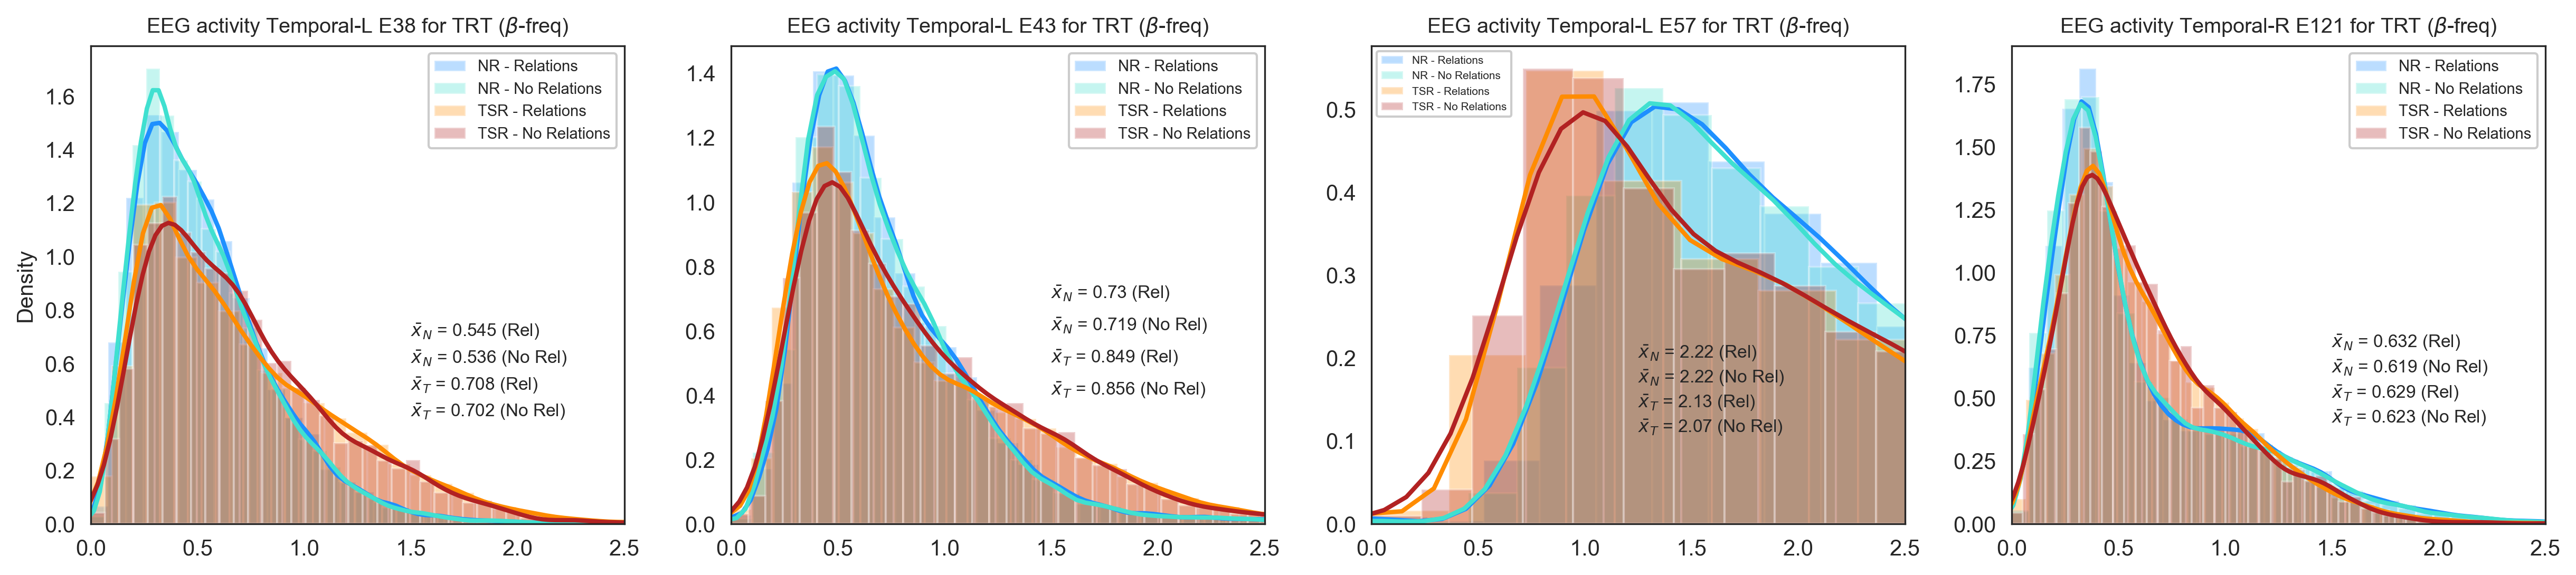

<Figure size 432x288 with 0 Axes>

In [71]:
kwargs = dict(hist_kws={'alpha':.3}, kde_kws={'linewidth':2})

feat = 0
fig, axes = plt.subplots(1, 4, figsize=(20, 4), dpi=300)
for i, _ in enumerate(axes):
    sns.distplot(eeg_feats_all_sbjs_task2_relations[:, temporal_indices_beta_all[feat]], color="dodgerblue", label="NR - Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task2_no_relations[:, temporal_indices_beta_all[feat]], color="turquoise", label="NR - No Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task3_relations[:, temporal_indices_beta_all[feat]], color="darkorange", label="TSR - Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task3_no_relations[:, temporal_indices_beta_all[feat]], color="firebrick", label="TSR - No Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    pos = [(1.25, 0.2), (1.25, 0.17), (1.25, 0.14), (1.25, 0.11)] if i == 2 else [(1.5, 0.7), (1.5, 0.6), (1.5, 0.5), (1.5, 0.4)]
    axes[i].annotate(r'$\bar x_N$ = {:.3g} (Rel) '.format(eeg_feats_all_sbjs_task2_relations[:, temporal_indices_beta_all[feat]].mean()), pos[0], fontsize=8)
    axes[i].annotate(r'$\bar x_N$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task2_no_relations[:, temporal_indices_beta_all[feat]].mean()), pos[1], fontsize=8)
    axes[i].annotate(r'$\bar x_T$ = {:.3g} (Rel)'.format(eeg_feats_all_sbjs_task3_relations[:, temporal_indices_beta_all[feat]].mean()), pos[2], fontsize=8)
    axes[i].annotate(r'$\bar x_T$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task3_no_relations[:, temporal_indices_beta_all[feat]].mean()), pos[3], fontsize=8)
    if i < 3:
        axes[i].set_title(r'EEG activity Temporal-L {} for {} ($\beta$-freq)'.format(temporal_electrodes_beta_all[feat], et_feature), fontsize=9.5)
    else:
        axes[i].set_title(r'EEG activity Temporal-R {} for {} ($\beta$-freq)'.format(temporal_electrodes_beta_all[feat], et_feature), fontsize=9.5)
    if i == 0: axes[i].set_ylabel(r'Density')
    loc = 'upper left' if i == 2 else 'upper right'
    size = {'size': 5} if i == 2 else {'size': 7}
    axes[i].legend(fancybox=True, framealpha=1, loc=loc, prop=size)
    axes[i].set_xlim(0, 2.5)
    feat += 1
#plt.savefig('plots/alpha_activity_temporal')
plt.show()
plt.clf()

### Density plots for activity in frontoparietal cortex across all tasks and subjects

In [ ]:
kwargs = dict(hist_kws={'alpha':.2}, kde_kws={'linewidth':2})

feat = 0
fig, axes = plt.subplots(1, 4, figsize=(16, 14), dpi=300)
for i, _ in enumerate(axes):
    sns.distplot(eeg_feats_all_sbjs_task2_relations[:, frontoparietal_indices_beta_all[feat]], color="dodgerblue", label="NR - Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task2_no_relations[:, frontoparietal_indices_beta_all[feat]], color="turquoise", label="NR - No Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task3_relations[:, frontoparietal_indices_beta_all[feat]], color="darkorange", label="TSR - Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task3_no_relations[:, frontoparietal_indices_beta_all[feat]], color="firebrick", label="TSR - No Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    pos = [(1.5, 0.6), (1.5, 0.55), (1.5, 0.5), (1.5, 0.45)] if j == 1 else [(1.5, 0.7), (1.5, 0.6), (1.5, 0.5), (1.5, 0.4)]
    axes[i].annotate(r'$\bar x_N$ = {:.3g} (Rel) '.format(eeg_feats_all_sbjs_task2_relations[:, frontoparietal_indices_beta_all[feat]].mean()), pos[0], fontsize=8)
    axes[i].annotate(r'$\bar x_N$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task2_no_relations[:, frontoparietal_indices_beta_all[feat]].mean()), pos[1], fontsize=8)
    axes[i].annotate(r'$\bar x_T$ = {:.3g} (Rel)'.format(eeg_feats_all_sbjs_task3_relations[:, frontoparietal_indices_beta_all[feat]].mean()), pos[2], fontsize=8)
    axes[i].annotate(r'$\bar x_T$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task3_no_relations[:, frontoparietal_indices_beta_all[feat]].mean()), pos[3], fontsize=8)
    if j == 0 or j == 2:
        axes[i].set_title(r'EEG activity Frontal {} for {} ($\beta$-freq)'.format(frontoparietal_electrodes_beta_all[feat], et_feature), fontsize = 10)
    else:
        axes[i].set_title(r'EEG activity Parietal {} for {} ($\beta$-freq)'.format(frontoparietal_electrodes_beta_all[feat], et_feature), fontsize = 10)
    if j == 0: axes[i].set_ylabel(r'Density')
    axes[i].legend(fancybox=True, framealpha=1, loc='upper right', prop={'size':7})
    axes[i].set_xlim(0, 2.5)
    feat += 1
#plt.savefig('plots/alpha_activity_temporal')
plt.show()
plt.clf()

### Brain activity in the temporal cortex over time for single test subject(s) (Normal Reading)

In [ ]:
et_feat_idx = 0
feat = 0
fig, axes = plt.subplots(2, 2, figsize=(20, 12), dpi=300)
for i, row in enumerate(axes):
    if (i % 2 == 0) and (i > 0): et_feat_idx += 1
    for j, col in enumerate(row):
        axes[i][j].matshow(truncating(map_electrode_onto_tensor(eeg_data_per_sent_task2_sbj1, temporal_indices_beta_all[feat])).T, cmap='CMRmap')
        if (i % 2 == 0) or (i % 2 != 0 and j == 0):
            axes[i][j].set_title(r'EEG activity Temporal-L {} for {} ($\beta$-freq)'.format(temporal_electrodes_beta_all[feat], et_feature), fontsize = 10)
        else:
            axes[i][j].set_title(r'EEG activity Temporal-R {} for {} ($\beta$-freq)'.format(temporal_electrodes_beta_all[feat], et_feature), fontsize = 10)
        axes[i][j].set_xlabel('Sentence number')
        axes[i][j].set_ylabel('Timesteps')
        axes[i][j].xaxis.set_tick_params(labeltop=False)
        axes[i][j].xaxis.set_tick_params(labelbottom=True)
        feat += 1
plt.savefig('plots/beta_activity_temporal_heatmap_sbj1_task2')
plt.show()
plt.clf()

### Brain activity in the temporal cortex over time for single test subject(s) (Task Specific Reading)

In [ ]:
et_feat_idx = 0
feat = 0
fig, axes = plt.subplots(2, 2, figsize=(24, 12), dpi=300)
for i, row in enumerate(axes):
    if (i % 2 == 0) and (i > 0): et_feat_idx += 1
    for j, col in enumerate(row):
        axes[i][j].matshow(truncating(map_electrode_onto_tensor(eeg_data_per_sent_task3_sbj1, temporal_indices_beta_all[feat])).T, cmap = 'CMRmap')
        if (i % 2 == 0) or (i % 2 != 0 and j == 0):
            axes[i][j].set_title(r'EEG activity Temporal-L {} for {} ($\beta$-freq)'.format(temporal_electrodes_beta_all[feat], et_feature), fontsize = 10)
        else:
            axes[i][j].set_title(r'EEG activity Temporal-R {} for {} ($\beta$-freq)'.format(temporal_electrodes_beta_all[feat], et_feature), fontsize = 10)
        axes[i][j].set_xlabel('Sentence number')
        axes[i][j].set_ylabel('Timesteps')
        axes[i][j].xaxis.set_tick_params(labeltop=False)
        axes[i][j].xaxis.set_tick_params(labelbottom=True)
        feat += 1
plt.savefig('plots/beta_activity_temporal_heatmap_sbj1_task3')
plt.show()
plt.clf()

## $\gamma$-frequency domain

In [ ]:
## Temporal Cortex ##
temporal_electrodes_gamma_all, temporal_indices_gamma_all = extract_electrodes_and_indices(eeg_electrodes_all,
                                                                                           eeg_locs_gamma_freqs, 
                                                                                           temporal_electrodes_gamma, 
                                                                                           k=20)
## Frontal & Parietal Cortex ##
frontoparietal_electrodes_gamma_all, frontoparietal_indices_gamma_all = extract_electrodes_and_indices(eeg_electrodes_all,
                                                                                                       eeg_locs_gamma_freqs, 
                                                                                                       frontoparietal_electrodes_gamma, 
                                                                                                       k=20)

In [ ]:
#kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':2})

#feat = 0
#fig, axes = plt.subplots(4, 4, figsize=(16, 14), dpi=100)
#for i, row in enumerate(axes):
#    for j, col in enumerate(row):
#        sns.distplot(eeg_feats_all_sbjs_task2[:, temporal_indices_gamma_all[feat]], color="dodgerblue", label="Normal Reading (NR)", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
#        sns.distplot(eeg_feats_all_sbjs_task3[:, temporal_indices_gamma_all[feat]], color="orange", label="Task Specific Reading (TSR)", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
#        axes[i][j].annotate(r'$\bar x_N$ = {:.3g}'.format(eeg_feats_all_sbjs_task2[:, temporal_indices_gamma_all[feat]].mean()), (1.8, 0.6))
#        axes[i][j].annotate(r'$\bar x_T$ = {:.3g}'.format(eeg_feats_all_sbjs_task3[:, temporal_indices_gamma_all[feat]].mean()), (1.8, 0.45))
#        axes[i][j].set_title(r'EEG activity Temporal-{} for {} ($\gamma$-freq)'.format(temporal_electrodes_gamma_all[feat], et_features[i]), fontsize=10)
#        axes[i][j].set_ylabel(r'Density')
#        axes[i][j].legend(fancybox=True, framealpha=1, loc='upper right', prop={'size':7})
#        axes[i][j].set_xlim(0, 2.5)
#        feat += 1
#plt.savefig('plots/gamma_activity_temporal')
#plt.show()

### Density plots for activity in temporal cortex across all tasks and subjects

In [ ]:
kwargs = dict(hist_kws={'alpha':.3}, kde_kws={'linewidth':2})

feat = 0
fig, axes = plt.subplots(4, 4, figsize=(16, 14), dpi=300)
for i, _ in enumerate(axes):
    sns.distplot(eeg_feats_all_sbjs_task2_relations[:, temporal_indices_gamma_all[feat]], color="dodgerblue", label="NR - Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task2_no_relations[:, temporal_indices_gamma_all[feat]], color="turquoise", label="NR - No Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task3_relations[:, temporal_indices_gamma_all[feat]], color="darkorange", label="TSR - Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task3_no_relations[:, temporal_indices_gamma_all[feat]], color="firebrick", label="TSR - No Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    axes[i].annotate(r'$\bar x_N$ = {:.3g} (Rel) '.format(eeg_feats_all_sbjs_task2_relations[:, temporal_indices_gamma_all[feat]].mean()), (1.5, 0.7), fontsize=8)
    axes[i].annotate(r'$\bar x_N$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task2_no_relations[:, temporal_indices_gamma_all[feat]].mean()), (1.5, 0.6), fontsize=8)      
    axes[i].annotate(r'$\bar x_T$ = {:.3g} (Rel)'.format(eeg_feats_all_sbjs_task3_relations[:, temporal_indices_gamma_all[feat]].mean()), (1.5, 0.5), fontsize=8)
    axes[i].annotate(r'$\bar x_T$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task3_no_relations[:, temporal_indices_gamma_all[feat]].mean()), (1.5, 0.4), fontsize=8)
    if i < 3:
        axes[i].set_title(r'EEG activity Temporal-L {} for {} ($\gamma$-freq)'.format(temporal_electrodes_gamma_all[feat], et_feature), fontsize=9.5)
    else:
        axes[i].set_title(r'EEG activity Temporal-R {} for {} ($\gamma$-freq)'.format(temporal_electrodes_gamma_all[feat], et_feature), fontsize=9.5)
    if i == 0: axes[i].set_ylabel(r'Density')
    axes[i].legend(fancybox=True, framealpha=1, loc='upper right', prop={'size':7})
    axes[i].set_xlim(0, 2.5)
    feat += 1
#plt.savefig('plots/alpha_activity_temporal')
plt.show()
plt.clf()

### Density plots for activity in frontoparietal cortex across all tasks and subjects

In [ ]:
kwargs = dict(hist_kws={'alpha':.2}, kde_kws={'linewidth':2})

feat = 0
fig, axes = plt.subplots(4, 3, figsize=(16, 14), dpi=300)
for i, _ in enumerate(axes):
    sns.distplot(eeg_feats_all_sbjs_task2_relations[:, frontoparietal_indices_gamma_all[feat]], color="dodgerblue", label="NR - Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task2_no_relations[:, frontoparietal_indices_gamma_all[feat]], color="turquoise", label="NR - No Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task3_relations[:, frontoparietal_indices_gamma_all[feat]], color="darkorange", label="TSR - Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task3_no_relations[:, frontoparietal_indices_gamma_all[feat]], color="firebrick", label="TSR - No Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    pos = [(1.5, 0.9), (1.5, 0.75), (1.5, 0.6), (1.5, 0.45)] if i > 0 else [(1.5, 0.7), (1.5, 0.6), (1.5, 0.5), (1.5, 0.4)]
    axes[i].annotate(r'$\bar x_N$ = {:.3g} (Rel) '.format(eeg_feats_all_sbjs_task2_relations[:, frontoparietal_indices_gamma_all[feat]].mean()), pos[0], fontsize=8)
    axes[i].annotate(r'$\bar x_N$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task2_no_relations[:, frontoparietal_indices_gamma_all[feat]].mean()), pos[1], fontsize=8)
    axes[i].annotate(r'$\bar x_T$ = {:.3g} (Rel)'.format(eeg_feats_all_sbjs_task3_relations[:, frontoparietal_indices_gamma_all[feat]].mean()), pos[2], fontsize=8)
    axes[i].annotate(r'$\bar x_T$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task3_no_relations[:, frontoparietal_indices_gamma_all[feat]].mean()), pos[3], fontsize=8)
    if i < 2:
        axes[i].set_title(r'EEG activity Frontal {} for {} ($\gamma$-freq)'.format(frontoparietal_electrodes_gamma_all[feat], et_feature), fontsize = 10)
    else:
        axes[i].set_title(r'EEG activity Parietal {} for {} ($\gamma$-freq)'.format(frontoparietal_electrodes_gamma_all[feat], et_feature), fontsize = 10)
    if i == 0: axes[i].set_ylabel(r'Density')
    axes[i].legend(fancybox=True, framealpha=1, loc='upper right', prop={'size':7})
    axes[i].set_xlim(0, 2.5)
    feat += 1
#plt.savefig('plots/alpha_activity_temporal')
plt.show()
plt.clf()

### Brain activity in the temporal cortex over time for single test subject(s) (Normal Reading)

In [ ]:
et_feat_idx = 0
feat = 0
fig, axes = plt.subplots(8, 2, figsize=(20, 12), dpi=300)
for i, row in enumerate(axes):
    if (i % 2 == 0) and (i > 0): et_feat_idx += 1
    for j, col in enumerate(row):
        axes[i][j].matshow(truncating(map_electrode_onto_tensor(eeg_data_per_sent_task2_sbj1, temporal_indices_gamma_all[feat])).T, cmap='CMRmap')
        if (i % 2 == 0) or (i % 2 != 0 and j == 0):
            axes[i][j].set_title(r'EEG activity Temporal-L {} for {} ($\gamma$-freq)'.format(temporal_electrodes_beta_all[feat], et_feature), fontsize = 10)
        else:
            axes[i][j].set_title(r'EEG activity Temporal-R {} for {} ($\gamma$-freq)'.format(temporal_electrodes_beta_all[feat], et_feature), fontsize = 10)
        axes[i][j].set_xlabel('Sentence number')
        axes[i][j].set_ylabel('Timesteps')
        axes[i][j].xaxis.set_tick_params(labeltop=False)
        axes[i][j].xaxis.set_tick_params(labelbottom=True)
        feat += 1
plt.savefig('plots/gamma_activity_temporal_heatmap_sbj1_task2')
plt.show()

### Brain activity in the temporal cortex over time for single test subject(s) (Task Specific Reading)

In [ ]:
et_feat_idx = 0
feat = 0
fig, axes = plt.subplots(8, 2, figsize=(24, 12), dpi=300)
for i, row in enumerate(axes):
    if (i % 2 == 0) and (i > 0): et_feat_idx += 1
    for j, col in enumerate(row):
        axes[i][j].matshow(truncating(map_electrode_onto_tensor(eeg_data_per_sent_task3_sbj1, temporal_indices_gamma_all[feat])).T, cmap='CMRmap')
        if (i % 2 == 0) or (i % 2 != 0 and j == 0):
            axes[i][j].set_title(r'EEG activity Temporal-L {} for {} ($\beta$-freq)'.format(temporal_electrodes_beta_all[feat], et_feature), fontsize = 10)
        else:
            axes[i][j].set_title(r'EEG activity Temporal-R {} for {} ($\beta$-freq)'.format(temporal_electrodes_beta_all[feat], et_feature), fontsize = 10)
        axes[i][j].set_xlabel('Sentence number')
        axes[i][j].set_ylabel('Timesteps')
        axes[i][j].xaxis.set_tick_params(labeltop=False)
        axes[i][j].xaxis.set_tick_params(labelbottom=True)
        feat += 1
plt.savefig('plots/gamma_activity_temporal_heatmap_sbj1_task3')
plt.show()

## $\theta$-frequency domain

In [ ]:
## Temporal Cortex ##
temporal_electrodes_theta_all, temporal_indices_theta_all = extract_electrodes_and_indices(eeg_electrodes_all,
                                                                                           eeg_locs_theta_freqs, 
                                                                                           temporal_electrodes_theta, 
                                                                                           k=30)
## Frontal & Parietal Cortex ##
frontoparietal_electrodes_theta_all, frontoparietal_indices_theta_all = extract_electrodes_and_indices(eeg_electrodes_all,
                                                                                           eeg_locs_theta_freqs, 
                                                                                           frontoparietal_electrodes_theta, 
                                                                                           k=30)

In [ ]:
#kwargs = dict(hist_kws={'alpha':.5}, kde_kws={'linewidth':2})

#feat = 0
#fig, axes = plt.subplots(4, 4, figsize=(16, 14), dpi=100)
#for i, row in enumerate(axes):
#    for j, col in enumerate(row):
#        sns.distplot(eeg_feats_all_sbjs_task2[:, temporal_indices_theta_all[feat]], color="dodgerblue", label="Normal Reading (NR)", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
#        sns.distplot(eeg_feats_all_sbjs_task3[:, temporal_indices_theta_all[feat]], color="orange", label="Task Specific Reading (TSR)", kde=True, norm_hist=True, ax=axes[i][j], **kwargs)
#        axes[i][j].annotate(r'$\bar x_N$ = {:.3g}'.format(eeg_feats_all_sbjs_task2[:, temporal_indices_theta_all[feat]].mean()), (1.8, 0.6))
#        axes[i][j].annotate(r'$\bar x_T$ = {:.3g}'.format(eeg_feats_all_sbjs_task3[:, temporal_indices_theta_all[feat]].mean()), (1.8, 0.5))
#        axes[i][j].set_title(r'EEG activity Temporal-{} for {} ($\theta$-freq)'.format(temporal_electrodes_theta_all[feat], et_features[i]), fontsize = 10)
#        axes[i][j].set_ylabel(r'Density')
#        axes[i][j].legend(fancybox=True, framealpha=1, loc='upper right', prop={'size':7})
#        axes[i][j].set_xlim(0, 2.5)
#        feat += 1
#plt.savefig('plots/theta_activity_temporal')
#plt.show()

### Density plots for activity in temporal cortex across all tasks and subjects

In [ ]:
kwargs = dict(hist_kws={'alpha':.3}, kde_kws={'linewidth':2})

feat = 0
fig, axes = plt.subplots(4, 5, figsize=(16, 12), dpi=300)
for i, _ in enumerate(axes):
    sns.distplot(eeg_feats_all_sbjs_task2_relations[:, temporal_indices_theta_all[feat]], color="dodgerblue", label="NR - Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task2_no_relations[:, temporal_indices_theta_all[feat]], color="turquoise", label="NR - No Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task3_relations[:, temporal_indices_theta_all[feat]], color="darkorange", label="TSR - Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task3_no_relations[:, temporal_indices_theta_all[feat]], color="firebrick", label="TSR - No Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    pos = [(1.3, 0.6), (1.3, 0.53), (1.3, 0.46), (1.3, 0.39)] if i == 2 else [(1.3, 0.7), (1.3, 0.6), (1.3, 0.5), (1.3, 0.4)]
    axes[i].annotate(r'$\bar x_N$ = {:.3g} (Rel) '.format(eeg_feats_all_sbjs_task2_relations[:, temporal_indices_theta_all[feat]].mean()), pos[0], fontsize=7.5)
    axes[i].annotate(r'$\bar x_N$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task2_no_relations[:, temporal_indices_theta_all[feat]].mean()), pos[1], fontsize=7.5)
    axes[i].annotate(r'$\bar x_T$ = {:.3g} (Rel)'.format(eeg_feats_all_sbjs_task3_relations[:, temporal_indices_theta_all[feat]].mean()), pos[2], fontsize=7.5)
    axes[i].annotate(r'$\bar x_T$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task3_no_relations[:, temporal_indices_theta_all[feat]].mean()), pos[3], fontsize=7.5)
    if i < 2:
        axes[i].set_title(r'EEG activity Temporal-L {} for {} ($\theta$-freq)'.format(temporal_electrodes_theta_all[feat], et_feature), fontsize=7.5)
    else:
        axes[i].set_title(r'EEG activity Temporal-R {} for {} ($\theta$-freq)'.format(temporal_electrodes_theta_all[feat], et_feature), fontsize=7.5)
    if i == 0: axes[i].set_ylabel(r'Density')
    axes[i].legend(fancybox=True, framealpha=1, loc='upper right', prop={'size':6})
    axes[i].set_xlim(0, 2.5)
    feat += 1
#plt.savefig('plots/alpha_activity_temporal')
plt.show()
plt.clf()

### Density plots for activity in frontoparietal cortex across all tasks and subjects

In [ ]:
kwargs = dict(hist_kws={'alpha':.2}, kde_kws={'linewidth':2})

pos = [(1.7, 0.55), (1.7, 0.5), (1.7, 0.45), (1.7, 0.40)]
feat = 0
fig, axes = plt.subplots(1, 3, figsize=(16, 14), dpi=300)
for i, _ in enumerate(axes):
    sns.distplot(eeg_feats_all_sbjs_task2_relations[:, frontoparietal_indices_theta_all[feat]], color="dodgerblue", label="NR - Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task2_no_relations[:, frontoparietal_indices_theta_all[feat]], color="turquoise", label="NR - No Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task3_relations[:, frontoparietal_indices_theta_all[feat]], color="darkorange", label="TSR - Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    sns.distplot(eeg_feats_all_sbjs_task3_no_relations[:, frontoparietal_indices_theta_all[feat]], color="firebrick", label="TSR - No Relations", kde=True, norm_hist=True, ax=axes[i], **kwargs)
    axes[i].annotate(r'$\bar x_N$ = {:.3g} (Rel) '.format(eeg_feats_all_sbjs_task2_relations[:, frontoparietal_indices_theta_all[feat]].mean()), pos[0], fontsize=8)
    axes[i].annotate(r'$\bar x_N$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task2_no_relations[:, frontoparietal_indices_theta_all[feat]].mean()), pos[1], fontsize=8)
    axes[i].annotate(r'$\bar x_T$ = {:.3g} (Rel)'.format(eeg_feats_all_sbjs_task3_relations[:, frontoparietal_indices_theta_all[feat]].mean()), pos[2], fontsize=8)
    axes[i].annotate(r'$\bar x_T$ = {:.3g} (No Rel)'.format(eeg_feats_all_sbjs_task3_no_relations[:, frontoparietal_indices_theta_all[feat]].mean()), pos[3], fontsize=8)
    if i == 0:
        axes[i].set_title(r'EEG activity Frontal {} for {} ($\theta$-freq)'.format(frontoparietal_electrodes_theta_all[feat], et_feature), fontsize = 11)
    elif i == 1:
        axes[i].set_title(r'EEG activity Frontoparietal {} for {} ($\theta$-freq)'.format(frontoparietal_electrodes_theta_all[feat], et_feature), fontsize = 11)
    else:
        axes[i].set_title(r'EEG activity Parietal {} for {} ($\theta$-freq)'.format(frontoparietal_electrodes_theta_all[feat], et_feature), fontsize = 11)
    if i == 0: axes[i].set_ylabel(r'Density')
    axes[i].legend(fancybox=True, framealpha=1, loc='upper right', prop={'size':7})
    axes[i].set_xlim(0, 2.5)
    feat += 1
#plt.savefig('plots/theta_activity_frontoparietal')
plt.show()
plt.clf()

### Brain activity in the temporal cortex over time for single test subject(s) (Normal Reading)

In [ ]:
et_feat_idx = 0
feat = 0
fig, axes = plt.subplots(2, 2, figsize=(20, 12), dpi=300)
for i, row in enumerate(axes):
    if (i % 2 == 0) and (i > 0): et_feat_idx += 1
    for j, col in enumerate(row):
        axes[i][j].matshow(truncating(map_electrode_onto_tensor(eeg_data_per_sent_task2_sbj1, temporal_indices_theta_all[feat])).T, cmap = 'CMRmap')
        axes[i][j].set_title(r'EEG activity Temporal {} for {} ($\theta$-freq)'.format(temporal_electrodes_theta_all[feat], et_feature), fontsize = 10)
        axes[i][j].set_xlabel('Sentence number')
        axes[i][j].set_ylabel('Timesteps')
        axes[i][j].xaxis.set_tick_params(labeltop=False)
        axes[i][j].xaxis.set_tick_params(labelbottom=True)
        feat += 1
plt.savefig('plots/theta_activity_temporal_heatmap_sbj1_task2')
plt.show()

### Brain activity in the temporal cortex over time for single test subject(s) (Task Specific Reading)

In [ ]:
et_feat_idx = 0
feat = 0
fig, axes = plt.subplots(2, 2, figsize=(24, 12), dpi=300)
for i, row in enumerate(axes):
    if (i % 2 == 0) and (i > 0): et_feat_idx += 1
    for j, col in enumerate(row):
        axes[i][j].matshow(truncating(map_electrode_onto_tensor(eeg_data_per_sent_task3_sbj1, temporal_indices_theta_all[feat])).T, cmap='CMRmap')
        axes[i][j].set_title(r'EEG activity Temporal {} for {} ($\theta$-freq)'.format(temporal_electrodes_theta_all[feat], et_feature), fontsize = 10)
        axes[i][j].set_xlabel('Sentence number')
        axes[i][j].set_ylabel('Timesteps')
        axes[i][j].xaxis.set_tick_params(labeltop=False)
        axes[i][j].xaxis.set_tick_params(labelbottom=True)
        feat += 1
plt.savefig('plots/theta_activity_temporal_heatmap_sbj1_task3')
plt.show()